In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Version Used for the Library are

In [2]:
print("Pandas Version       : {}".format(pd.__version__))
print("Numpy  Version       : {}".format(np.__version__))
print("Seaborn Version      : {}".format(sns.__version__))
print("Matplotlib Version   : {}".format(matplotlib.__version__))
print("StatModel Version    : {}".format(sm.__version__))

Pandas Version       : 1.3.4
Numpy  Version       : 1.20.3
Seaborn Version      : 0.11.2
Matplotlib Version   : 3.4.3
StatModel Version    : 0.12.2


In [3]:
!ls *.csv

data_dictionary.csv sample.csv          test.csv            train.csv


## Load the Dataset   

#### In case when we have a doubt we can review it 

In [4]:
df_dictionary = pd.read_csv('data_dictionary.csv',index_col=0)

In [5]:
df_dictionary

,Description
Acronyms,
CIRCLE_ID,Telecom circle area to which the customer belo...
LOC,Local calls within same telecom circle
STD,STD calls outside the calling circle
IC,Incoming calls
OG,Outgoing calls
T2T,Operator T to T ie within same operator mobile...
T2M,Operator T to other operator mobile
T2O,Operator T to other operator fixed line
T2F,Operator T to fixed lines of T


In [6]:
# Any time you want to query you can do this as well 
df_dictionary.loc['CIRCLE_ID'][0]

'Telecom circle area to which the customer belongs to'

In [7]:
telecom_df = pd.read_csv('train.csv')

In [8]:
print("Train Data set size : {}".format(telecom_df.shape))

# So we have around 171 Features and 1 Target varaible 


Train Data set size : (69999, 172)


In [9]:
telecom_df_test = pd.read_csv('test.csv')
telecom_df_test.shape

(30000, 171)

In [10]:
telecom_df.sample(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69832,69832,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,579.610,328.486,...,0,0,1.0,NaN,NaN,995,15.55,0.00,43.58,0
58605,58605,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,412.127,505.093,...,0,0,1.0,1.0,NaN,197,0.00,0.00,0.00,0
61439,61439,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,274.356,267.714,...,0,0,NaN,NaN,NaN,349,0.00,0.00,0.00,0
34933,34933,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,529.085,547.832,...,1,1,1.0,1.0,1.0,1690,699.55,702.82,1078.01,0
28616,28616,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,193.380,271.934,...,0,0,1.0,1.0,1.0,351,0.00,0.00,0.00,0


In [11]:
# We can find that it is mixture of numerical  ( float/int) and object

telecom_df.info(verbose=True)

#Most of them are the Integer or Float dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Custom functions 


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier



In [13]:
def logigistic_regression(X_train,y_train):
    model = LogisticRegression()
    model.fit(X_train,y_train)
    return model

def linear_svc(X_train,y_train,c=1.0,max_iter=1000):
    model = LinearSVC(C=c,max_iter=max_iter)
    model.fit(X_train,y_train)
    return model

def decision_tree(X_train,y_train,max_depth=None,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(X_train,y_train)
    return model

def randomforest(X_train,y_train,max_depth=None,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(X_train,y_train)
    return model

In [14]:
def score_model(y_test,y_pred):
    

    # Confusion metrics
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    Accuracy = accuracy_score(y_test,y_pred)
    Precision= precision_score(y_test,y_pred)
    Recall = recall_score(y_test,y_pred)
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP)
    False_positive_rate = (round(FP/ float(TN+FP), 4) * 100)
    True_positive_rate = (round(TP / float(TP+FP), 4)* 100)
    True_negative_rate = (round(TN / float(TN+ FN), 4) * 100)
    F1_score = f1_score(y_test, y_pred, average="macro")
    classification_err_rate = (round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100)
    
    results = { 'accuracy' : Accuracy,
                'precision' : Precision,
                'recall'  :  Recall,
                'sensitivity' :Sensitivity,
                'sensitivity' :   Specificity,
                'false_positive_rate' :True_positive_rate,
                'true_positive_rate' : True_negative_rate,
                'true_negative_rate' : True_negative_rate ,
                'f1_score' : F1_score ,
                'Classification_error_rate': classification_err_rate,
               }
    return results

    

In [15]:
def create_models(classifier,X,y,test_size = 0.25,scale=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =test_size, random_state = 4, stratify = y)
    
    if scale:
        scaler = StandardScaler()
        cols_scale = X_train.columns.to_list()
        X_train_sdf = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_sdf, columns=cols_scale)
        X_test = scaler.transform(X_test)
    
    
    model = classifier(X_train,y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    display(y_pred_train)
    display(y_pred_train)
    
    y_train_pred = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_pred_train})
    y_test_pred = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_pred_test})
    
    y_train_pred['predicted'] = y_train_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
    y_test_pred['predicted'] = y_test_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
    
    summary_train = score_model(y_train,y_train_pred['predicted'])
    summary_test = score_model(y_test,y_test_pred['predicted'])
    
    
    prediction_results = pd.DataFrame({'y_test' : y_test,
                                       'y_pred' : y_test_pred['predicted']},
                                    )
    model_crosstab = pd.crosstab(prediction_results['y_pred'],prediction_results['y_test'])
    
    model_results  = { 'training' : summary_train,
                       'test'     : summary_test,
                       'confusion_matrix' : model_crosstab,
                     }
    return model,model_results
    

In [16]:
def print_full_df(df):
    pd.options.display.max_rows = pd.options.display.max_columns = None
    display(df)
    pd.options.display.max_rows = 60
    pd.options.display.max_columns = 20

In [17]:
print_full_df(telecom_df.max())
# you can see that loc_og_t2o_mou/std_og_t2o_mou and loc_ic_t2o_mou

id                          69998
circle_id                     109
loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
last_date_of_month_6    6/30/2014
arpu_6                  27731.088
arpu_7                  35145.834
arpu_8                  33543.624
onnet_mou_6               7376.71
onnet_mou_7               8157.78
onnet_mou_8              10752.56
offnet_mou_6              8362.36
offnet_mou_7              7043.98
offnet_mou_8             14007.34
roam_ic_mou_6             2850.98
roam_ic_mou_7             4155.83
roam_ic_mou_8             4169.81
roam_og_mou_6             3775.11
roam_og_mou_7             2812.04
roam_og_mou_8             5337.04
loc_og_t2t_mou_6          6431.33
loc_og_t2t_mou_7          7400.66
loc_og_t2t_mou_8         10752.56
loc_og_t2m_mou_6          4696.83
loc_og_t2m_mou_7          4557.14
loc_og_t2m_mou_8          4961.33
loc_og_t2f_mou_6           617.58
loc_og_t2f_mou_7           815.33
loc_og_t2f_mou

## EDA 

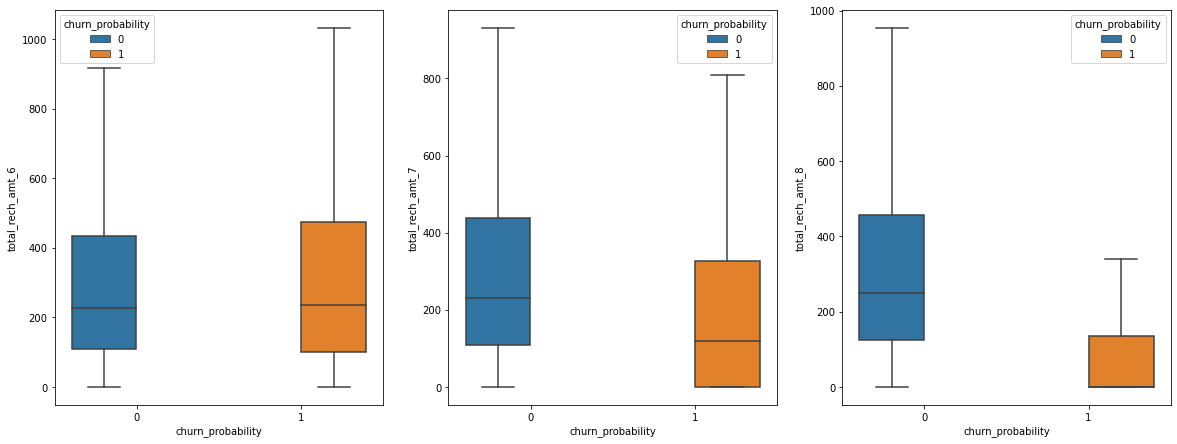

In [18]:
# Some interesting column to explore for total recharge 



plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=telecom_df, y='total_rech_amt_6',x="churn_probability",hue="churn_probability",
                showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_df, y='total_rech_amt_7',x="churn_probability",hue="churn_probability",
                showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_df, y='total_rech_amt_8',x="churn_probability",hue="churn_probability",
                            showfliers=False)
plt.show()
    


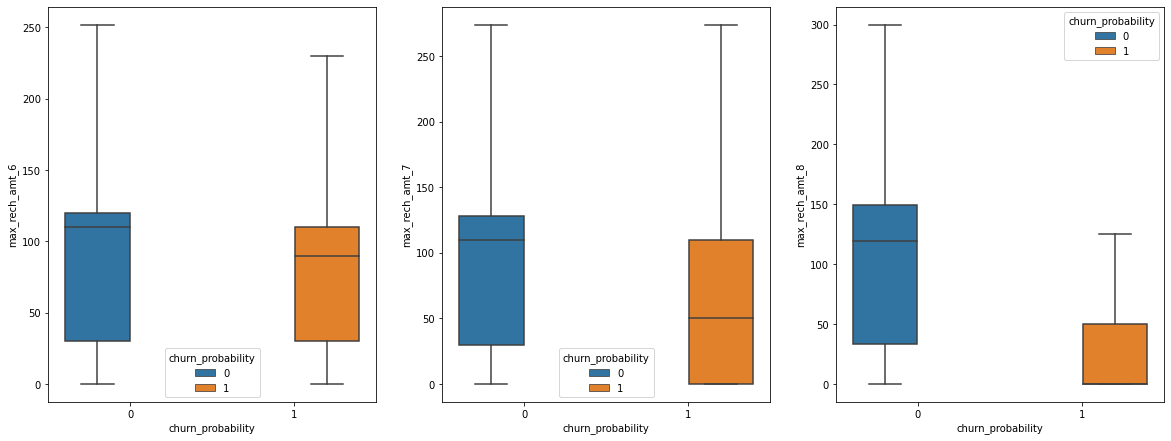

In [19]:
# Some interesting column to explore for Max recharge  recharge 



plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=telecom_df, y='max_rech_amt_6',x="churn_probability",hue="churn_probability",
                showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_df, y='max_rech_amt_7',x="churn_probability",hue="churn_probability",
                showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_df, y='max_rech_amt_8',x="churn_probability",hue="churn_probability",
                            showfliers=False)
plt.show()
    


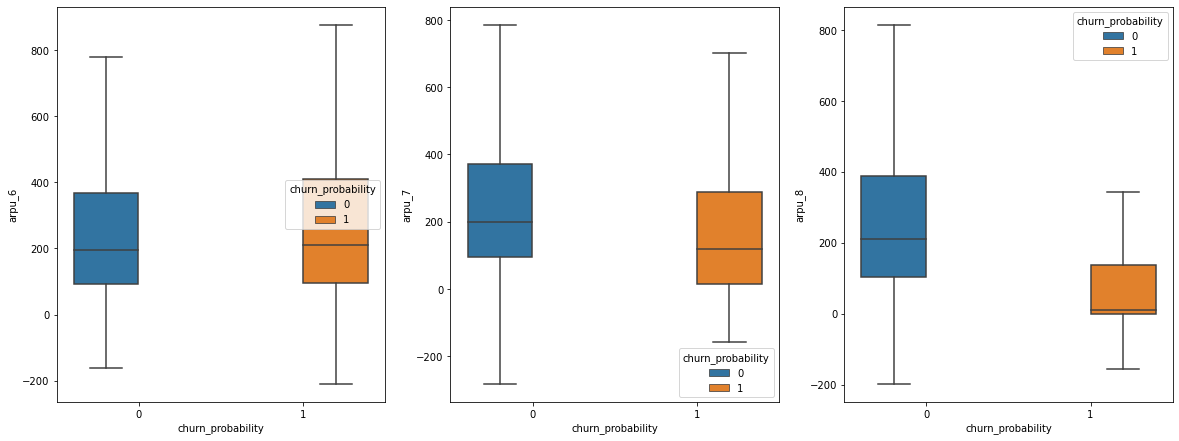

In [20]:
# Some interesting column to explore for Max recharge  recharge 



plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=telecom_df, y='arpu_6',x="churn_probability",hue="churn_probability",
                showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_df, y='arpu_7',x="churn_probability",hue="churn_probability",
                showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_df, y='arpu_8',x="churn_probability",hue="churn_probability",
                            showfliers=False)
plt.show()
    


### Data Cleansing 

In [21]:
# Check if any duplicates 
telecom_df.duplicated().sum()

0

In [22]:
telecom_df[telecom_df.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [23]:
telecom_df.describe()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [24]:
zero_value = (telecom_df.max() == 0.0).loc[lambda x : x == True]
display(zero_value)

for col in zero_value.index:
    
    print("Unique Value for {} : ".format(col),telecom_df[col].unique())
    
telecom_df[telecom_df[zero_value.index].isnull().head(30)][zero_value.index]
# Below are having Max value 0  and just Nan value 

loc_og_t2o_mou      True
std_og_t2o_mou      True
loc_ic_t2o_mou      True
std_og_t2c_mou_6    True
std_og_t2c_mou_7    True
std_og_t2c_mou_8    True
std_ic_t2o_mou_6    True
std_ic_t2o_mou_7    True
std_ic_t2o_mou_8    True
dtype: bool

Unique Value for loc_og_t2o_mou :  [ 0. nan]
Unique Value for std_og_t2o_mou :  [ 0. nan]
Unique Value for loc_ic_t2o_mou :  [ 0. nan]
Unique Value for std_og_t2c_mou_6 :  [ 0. nan]
Unique Value for std_og_t2c_mou_7 :  [ 0. nan]
Unique Value for std_og_t2c_mou_8 :  [ 0. nan]
Unique Value for std_ic_t2o_mou_6 :  [ 0. nan]
Unique Value for std_ic_t2o_mou_7 :  [ 0. nan]
Unique Value for std_ic_t2o_mou_8 :  [ 0. nan]


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
69994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Impute with the 0 for the null value as 0 and nan are the only values 
telecom_df['loc_og_t2o_mou'].fillna(0,inplace=True)
telecom_df['std_og_t2o_mou'].fillna(0,inplace=True)
telecom_df['loc_ic_t2o_mou'].fillna(0,inplace=True)


telecom_df_test

telecom_df_test['loc_og_t2o_mou'].fillna(0,inplace=True)
telecom_df_test['std_og_t2o_mou'].fillna(0,inplace=True)
telecom_df_test['loc_ic_t2o_mou'].fillna(0,inplace=True)


In [26]:
zero_value = (telecom_df.max() == 0.0).loc[lambda x : x == True]
display(zero_value)

for col in zero_value.index:
    
    print("Unique Value for {} : ".format(col),telecom_df[col].unique())
    
telecom_df[telecom_df[zero_value.index].isnull().head(30)][zero_value.index]



loc_og_t2o_mou      True
std_og_t2o_mou      True
loc_ic_t2o_mou      True
std_og_t2c_mou_6    True
std_og_t2c_mou_7    True
std_og_t2c_mou_8    True
std_ic_t2o_mou_6    True
std_ic_t2o_mou_7    True
std_ic_t2o_mou_8    True
dtype: bool

Unique Value for loc_og_t2o_mou :  [0.]
Unique Value for std_og_t2o_mou :  [0.]
Unique Value for loc_ic_t2o_mou :  [0.]
Unique Value for std_og_t2c_mou_6 :  [ 0. nan]
Unique Value for std_og_t2c_mou_7 :  [ 0. nan]
Unique Value for std_og_t2c_mou_8 :  [ 0. nan]
Unique Value for std_ic_t2o_mou_6 :  [ 0. nan]
Unique Value for std_ic_t2o_mou_7 :  [ 0. nan]
Unique Value for std_ic_t2o_mou_8 :  [ 0. nan]


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
69994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# look at missing value ratio in each column
missing_values = (telecom_df.isnull().sum()*100/telecom_df.shape[0])

print_full_df(missing_values.sort_values(ascending=False))


count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_3g_6                   74.902499
max_rech_data_6             74.902499
arpu_2g_6                   74.902499
av_rech_amt_data_6          74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
fb_user_6                   74.902499
count_rech_3g_6             74.902499
max_rech_data_7             74.478207
night_pck_user_7            74.478207
arpu_2g_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
date_of_last_rech_data_7    74.478207
fb_user_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_3g_7                   74.478207
total_rech_data_7           74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_8           73.689624
arpu_3g_8                   73.689624
arpu_2g_8                   73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
count_rech_2

In [28]:
telecom_df.select_dtypes(include='object').isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

In [29]:
#Just Immute with the last day of the month as it is obvious 
# We cannot assume or immute the date_of_last_rech_* and date_of_last_rech_data_* so we leave it alone for now 
telecom_df['last_date_of_month_6'] = '6/30/2014'
telecom_df['last_date_of_month_7'] = '7/31/2014'
telecom_df['last_date_of_month_8'] = '8/31/2014'


telecom_df_test['last_date_of_month_6'] = '6/30/2014'
telecom_df_test['last_date_of_month_7'] = '7/31/2014'
telecom_df_test['last_date_of_month_8'] = '8/31/2014'



In [30]:
telecom_df.select_dtypes(include='object').isnull().sum()

last_date_of_month_6            0
last_date_of_month_7            0
last_date_of_month_8            0
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

In [31]:
telecom_df.select_dtypes(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [32]:
total_columns =  [ col for col in telecom_df.columns if 'total' in col]
max_columns = [ col for col in telecom_df.columns if 'max' in col]
ic_mou_columns = [ col for col in telecom_df.columns if 'ic_mou' in col]
rech_column = [ col for col in telecom_df.columns if 'rech' in col]
count_rech_column= [ col for col in telecom_df.columns if 'count_rech' in col]
av_rech_column = [ col for col in telecom_df.columns if 'av_rech' in col]
net_mou_column = [ col for col in telecom_df.columns if 'net_mou' in col]
og_column = [ col for col in telecom_df.columns if 'og_' in col]


In [33]:
print("Max labeled columns are : {}\n".format(max_columns))
print("Total labeled  columns are : {}\n".format(total_columns))
print("Incoming Mou  labeled  columns are : {}\n".format(ic_mou_columns))
print("Reacharched   columns are : {}\n".format(ic_mou_columns))
print("Reacharched columns count columnsare : {}\n".format(count_rech_column))
print("Reacharched Average columns  are : {}\n".format(av_rech_column))
print("Internet mou columns    are : {}\n".format(av_rech_column))
print("Outgoing  mou columns    are : {}\n".format(av_rech_column))

Max labeled columns are : ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

Total labeled  columns are : ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']

Incoming Mou  labeled  columns are : ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']

Reacharched   columns are : ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic

In [34]:
#null value in the total labeled columns
telecom_df[total_columns].isnull().sum()

total_og_mou_6           0
total_og_mou_7           0
total_og_mou_8           0
total_ic_mou_6           0
total_ic_mou_7           0
total_ic_mou_8           0
total_rech_num_6         0
total_rech_num_7         0
total_rech_num_8         0
total_rech_amt_6         0
total_rech_amt_7         0
total_rech_amt_8         0
total_rech_data_6    52431
total_rech_data_7    52134
total_rech_data_8    51582
dtype: int64

In [35]:
## Fill null values for data pack recharge amount and count to 0 
data_recharge_columns_to_update = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']
telecom_df[data_recharge_columns_to_update] = telecom_df[data_recharge_columns_to_update].fillna(0)
display(telecom_df[total_columns].isnull().sum())


data_recharge_columns_to_update = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']
telecom_df_test[data_recharge_columns_to_update] = telecom_df_test[data_recharge_columns_to_update].fillna(0)
display(telecom_df_test[total_columns].isnull().sum())

total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
dtype: int64

total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
dtype: int64

In [36]:
#null value in the Max labeled columns
telecom_df[max_columns].isnull().sum()

max_rech_amt_6         0
max_rech_amt_7         0
max_rech_amt_8         0
max_rech_data_6    52431
max_rech_data_7    52134
max_rech_data_8    51582
dtype: int64

In [37]:
## Fill null values for recharge amount and count to 0 
data_recharge_columns_to_update = ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
telecom_df[data_recharge_columns_to_update] = telecom_df[data_recharge_columns_to_update].fillna(0)
display(telecom_df[max_columns].isnull().sum())


data_recharge_columns_to_update = ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
telecom_df_test[data_recharge_columns_to_update] = telecom_df_test[data_recharge_columns_to_update].fillna(0)
display(telecom_df_test[max_columns].isnull().sum())

max_rech_amt_6     0
max_rech_amt_7     0
max_rech_amt_8     0
max_rech_data_6    0
max_rech_data_7    0
max_rech_data_8    0
dtype: int64

max_rech_amt_6     0
max_rech_amt_7     0
max_rech_amt_8     0
max_rech_data_6    0
max_rech_data_7    0
max_rech_data_8    0
dtype: int64

In [38]:
#null value in the Max labeled columns
display(telecom_df[count_rech_column].isnull().sum())
display(telecom_df[total_columns].isnull().sum())

count_rech_2g_6    52431
count_rech_2g_7    52134
count_rech_2g_8    51582
count_rech_3g_6    52431
count_rech_3g_7    52134
count_rech_3g_8    51582
dtype: int64

total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
dtype: int64

In [39]:
## Fill null values for recharge amount and count to 0 
count_rech_column_to_update = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']
telecom_df[count_rech_column_to_update] = telecom_df[count_rech_column_to_update].fillna(0)
display(telecom_df[count_rech_column].isnull().sum())


## Fill null values for recharge amount and count to 0 
count_rech_column_to_update = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']
telecom_df_test[count_rech_column_to_update] = telecom_df_test[count_rech_column_to_update].fillna(0)
display(telecom_df_test[count_rech_column].isnull().sum())

count_rech_2g_6    0
count_rech_2g_7    0
count_rech_2g_8    0
count_rech_3g_6    0
count_rech_3g_7    0
count_rech_3g_8    0
dtype: int64

count_rech_2g_6    0
count_rech_2g_7    0
count_rech_2g_8    0
count_rech_3g_6    0
count_rech_3g_7    0
count_rech_3g_8    0
dtype: int64

In [40]:
telecom_df[av_rech_column].isnull().sum()

av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
av_rech_amt_data_8    51582
dtype: int64

In [41]:
#null value in the Max labeled columns
display(telecom_df[av_rech_column].isnull().sum())
display(telecom_df[total_columns].isnull().sum())

av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
av_rech_amt_data_8    51582
dtype: int64

total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
dtype: int64

In [42]:
## Fill null values for Average recharge amount and count to 0 
av_rech_column_to_update = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',]
telecom_df[av_rech_column_to_update] = telecom_df[av_rech_column_to_update].fillna(0)
display(telecom_df[av_rech_column_to_update].isnull().sum())


## Fill null values for Average recharge amount and count to 0 
av_rech_column_to_update = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',]
telecom_df_test[av_rech_column_to_update] = telecom_df_test[av_rech_column_to_update].fillna(0)
display(telecom_df_test[av_rech_column_to_update].isnull().sum())

av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [43]:
#null value in the IC MOU labeled columns
telecom_df[av_rech_column].isnull().sum()

av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [44]:
display(telecom_df[net_mou_column].isnull().sum())
display(telecom_df[total_columns].isnull().sum())

onnet_mou_6     2768
onnet_mou_7     2687
onnet_mou_8     3703
offnet_mou_6    2768
offnet_mou_7    2687
offnet_mou_8    3703
dtype: int64

total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
dtype: int64

In [45]:
av_rech_column_to_update = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',]
telecom_df[av_rech_column_to_update] = telecom_df[av_rech_column_to_update].fillna(0)
display(telecom_df[av_rech_column_to_update].isnull().sum())

av_rech_column_to_update = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',]
telecom_df_test[av_rech_column_to_update] = telecom_df_test[av_rech_column_to_update].fillna(0)
display(telecom_df_test[av_rech_column_to_update].isnull().sum())

onnet_mou_6     0
onnet_mou_7     0
onnet_mou_8     0
offnet_mou_6    0
offnet_mou_7    0
offnet_mou_8    0
dtype: int64

onnet_mou_6     0
onnet_mou_7     0
onnet_mou_8     0
offnet_mou_6    0
offnet_mou_7    0
offnet_mou_8    0
dtype: int64

In [46]:
telecom_df[og_column].isnull().sum()

loc_og_t2o_mou         0
std_og_t2o_mou         0
roam_og_mou_6       2768
roam_og_mou_7       2687
roam_og_mou_8       3703
loc_og_t2t_mou_6    2768
loc_og_t2t_mou_7    2687
loc_og_t2t_mou_8    3703
loc_og_t2m_mou_6    2768
loc_og_t2m_mou_7    2687
loc_og_t2m_mou_8    3703
loc_og_t2f_mou_6    2768
loc_og_t2f_mou_7    2687
loc_og_t2f_mou_8    3703
loc_og_t2c_mou_6    2768
loc_og_t2c_mou_7    2687
loc_og_t2c_mou_8    3703
loc_og_mou_6        2768
loc_og_mou_7        2687
loc_og_mou_8        3703
std_og_t2t_mou_6    2768
std_og_t2t_mou_7    2687
std_og_t2t_mou_8    3703
std_og_t2m_mou_6    2768
std_og_t2m_mou_7    2687
std_og_t2m_mou_8    3703
std_og_t2f_mou_6    2768
std_og_t2f_mou_7    2687
std_og_t2f_mou_8    3703
std_og_t2c_mou_6    2768
std_og_t2c_mou_7    2687
std_og_t2c_mou_8    3703
std_og_mou_6        2768
std_og_mou_7        2687
std_og_mou_8        3703
isd_og_mou_6        2768
isd_og_mou_7        2687
isd_og_mou_8        3703
spl_og_mou_6        2768
spl_og_mou_7        2687


In [47]:
og_column_to_update =  telecom_df[og_column].isnull().sum().index.to_list()
og_column_to_update
#print(len(og_column_to_update))
for col in ['loc_og_t2o_mou','std_og_t2o_mou','total_og_mou_6','total_og_mou_7','total_og_mou_8']:
    og_column_to_update.remove(col)
    
print(len(og_column_to_update))

42


In [48]:
telecom_df[og_column_to_update] = telecom_df[og_column_to_update].fillna(0)
telecom_df[og_column_to_update].isnull().sum()


roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
loc_og_t2c_mou_8    0
loc_og_mou_6        0
loc_og_mou_7        0
loc_og_mou_8        0
std_og_t2t_mou_6    0
std_og_t2t_mou_7    0
std_og_t2t_mou_8    0
std_og_t2m_mou_6    0
std_og_t2m_mou_7    0
std_og_t2m_mou_8    0
std_og_t2f_mou_6    0
std_og_t2f_mou_7    0
std_og_t2f_mou_8    0
std_og_t2c_mou_6    0
std_og_t2c_mou_7    0
std_og_t2c_mou_8    0
std_og_mou_6        0
std_og_mou_7        0
std_og_mou_8        0
isd_og_mou_6        0
isd_og_mou_7        0
isd_og_mou_8        0
spl_og_mou_6        0
spl_og_mou_7        0
spl_og_mou_8        0
og_others_6         0
og_others_7         0
og_others_8         0
dtype: int64

In [49]:
telecom_df_test[og_column_to_update] = telecom_df_test[og_column_to_update].fillna(0)
telecom_df_test[og_column_to_update].isnull().sum()

roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
loc_og_t2c_mou_8    0
loc_og_mou_6        0
loc_og_mou_7        0
loc_og_mou_8        0
std_og_t2t_mou_6    0
std_og_t2t_mou_7    0
std_og_t2t_mou_8    0
std_og_t2m_mou_6    0
std_og_t2m_mou_7    0
std_og_t2m_mou_8    0
std_og_t2f_mou_6    0
std_og_t2f_mou_7    0
std_og_t2f_mou_8    0
std_og_t2c_mou_6    0
std_og_t2c_mou_7    0
std_og_t2c_mou_8    0
std_og_mou_6        0
std_og_mou_7        0
std_og_mou_8        0
isd_og_mou_6        0
isd_og_mou_7        0
isd_og_mou_8        0
spl_og_mou_6        0
spl_og_mou_7        0
spl_og_mou_8        0
og_others_6         0
og_others_7         0
og_others_8         0
dtype: int64

In [50]:
## Impute *_ic as total_ic_mou is 0 for customer
ic_mou_column_to_updated = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',  'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8' ,'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',  'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',  'ic_others_6', 'ic_others_7', 'ic_others_8',  'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',  'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',  'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
telecom_df[ic_mou_column_to_updated] = telecom_df[ic_mou_column_to_updated].fillna(0)
display(telecom_df[ic_mou_column_to_updated].isnull().sum())


## Impute *_ic as total_ic_mou is 0 for customer
ic_mou_column_to_updated = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',  'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8' ,'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',  'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',  'ic_others_6', 'ic_others_7', 'ic_others_8',  'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',  'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',  'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
telecom_df_test[ic_mou_column_to_updated] = telecom_df_test[ic_mou_column_to_updated].fillna(0)
display(telecom_df_test[ic_mou_column_to_updated].isnull().sum())


roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
loc_ic_mou_6        0
loc_ic_mou_7        0
loc_ic_mou_8        0
std_ic_t2t_mou_6    0
std_ic_t2t_mou_7    0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_6    0
std_ic_t2m_mou_7    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_6    0
std_ic_t2f_mou_7    0
std_ic_t2f_mou_8    0
std_ic_t2o_mou_6    0
std_ic_t2o_mou_7    0
std_ic_t2o_mou_8    0
std_ic_mou_6        0
std_ic_mou_7        0
std_ic_mou_8        0
spl_ic_mou_6        0
spl_ic_mou_7        0
spl_ic_mou_8        0
isd_ic_mou_6        0
isd_ic_mou_7        0
isd_ic_mou_8        0
ic_others_6         0
ic_others_7         0
ic_others_8         0
loc_ic_t2t_mou_6    0
loc_ic_t2t_mou_7    0
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_6    0
loc_ic_t2m_mou_7    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_6    0
loc_ic_t2f_mou_7    0
loc_ic_t2f_mou_8    0
dtype: int64

roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
loc_ic_mou_6        0
loc_ic_mou_7        0
loc_ic_mou_8        0
std_ic_t2t_mou_6    0
std_ic_t2t_mou_7    0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_6    0
std_ic_t2m_mou_7    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_6    0
std_ic_t2f_mou_7    0
std_ic_t2f_mou_8    0
std_ic_t2o_mou_6    0
std_ic_t2o_mou_7    0
std_ic_t2o_mou_8    0
std_ic_mou_6        0
std_ic_mou_7        0
std_ic_mou_8        0
spl_ic_mou_6        0
spl_ic_mou_7        0
spl_ic_mou_8        0
isd_ic_mou_6        0
isd_ic_mou_7        0
isd_ic_mou_8        0
ic_others_6         0
ic_others_7         0
ic_others_8         0
loc_ic_t2t_mou_6    0
loc_ic_t2t_mou_7    0
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_6    0
loc_ic_t2m_mou_7    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_6    0
loc_ic_t2f_mou_7    0
loc_ic_t2f_mou_8    0
dtype: int64

In [51]:
#null value in the Recharged labeled columns
missing_values = (telecom_df.isnull().sum()*100/telecom_df.shape[0])

print_full_df(missing_values.sort_values(ascending=False))


arpu_3g_6                   74.902499
date_of_last_rech_data_6    74.902499
arpu_2g_6                   74.902499
fb_user_6                   74.902499
night_pck_user_6            74.902499
arpu_3g_7                   74.478207
date_of_last_rech_data_7    74.478207
fb_user_7                   74.478207
arpu_2g_7                   74.478207
night_pck_user_7            74.478207
night_pck_user_8            73.689624
arpu_3g_8                   73.689624
arpu_2g_8                   73.689624
date_of_last_rech_data_8    73.689624
fb_user_8                   73.689624
date_of_last_rech_8          3.515765
date_of_last_rech_7          1.762882
date_of_last_rech_6          1.572880
total_rech_amt_7             0.000000
total_rech_amt_6             0.000000
total_rech_num_8             0.000000
max_rech_amt_8               0.000000
total_rech_amt_8             0.000000
last_day_rch_amt_6           0.000000
total_rech_num_7             0.000000
last_day_rch_amt_7           0.000000
max_rech_amt

In [52]:
#null value in the Recharged labeled columns
missing_values_test = (telecom_df_test.isnull().sum()*100/telecom_df.shape[0])

print_full_df(missing_values.sort_values(ascending=False))

arpu_3g_6                   74.902499
date_of_last_rech_data_6    74.902499
arpu_2g_6                   74.902499
fb_user_6                   74.902499
night_pck_user_6            74.902499
arpu_3g_7                   74.478207
date_of_last_rech_data_7    74.478207
fb_user_7                   74.478207
arpu_2g_7                   74.478207
night_pck_user_7            74.478207
night_pck_user_8            73.689624
arpu_3g_8                   73.689624
arpu_2g_8                   73.689624
date_of_last_rech_data_8    73.689624
fb_user_8                   73.689624
date_of_last_rech_8          3.515765
date_of_last_rech_7          1.762882
date_of_last_rech_6          1.572880
total_rech_amt_7             0.000000
total_rech_amt_6             0.000000
total_rech_num_8             0.000000
max_rech_amt_8               0.000000
total_rech_amt_8             0.000000
last_day_rch_amt_6           0.000000
total_rech_num_7             0.000000
last_day_rch_amt_7           0.000000
max_rech_amt

# Derive new Columns

Derive a new column wutht the amt 
  

In [53]:
telecom_df.shape

(69999, 172)

In [54]:
telecom_df['total_data_rech_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']
telecom_df['total_data_rech_amt_8'] = telecom_df['total_rech_data_8'] * telecom_df['av_rech_amt_data_8']

telecom_df.head(10)


telecom_df_test['total_data_rech_amt_6'] = telecom_df_test['total_rech_data_6'] * telecom_df_test['av_rech_amt_data_6']
telecom_df_test['total_data_rech_amt_7'] = telecom_df_test['total_rech_data_7'] * telecom_df_test['av_rech_amt_data_7']
telecom_df_test['total_data_rech_amt_8'] = telecom_df_test['total_rech_data_8'] * telecom_df_test['av_rech_amt_data_8']

telecom_df_test.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,NaN,NaN,NaN,1692,0.00,0.00,0.00,0.0,0.0,0.0
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,NaN,NaN,NaN,2533,0.00,0.00,0.00,0.0,0.0,0.0
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,NaN,NaN,NaN,277,525.61,758.41,241.84,0.0,0.0,0.0
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,NaN,NaN,NaN,1244,0.00,0.00,0.00,0.0,0.0,0.0
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,NaN,NaN,NaN,462,0.00,0.00,0.00,0.0,0.0,0.0
5,70004,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,134.798,58.016,...,NaN,NaN,NaN,1586,0.00,0.00,0.00,0.0,0.0,0.0
6,70005,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,41.890,20.120,...,NaN,NaN,NaN,1218,0.00,0.00,0.00,0.0,0.0,0.0
7,70006,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,52.177,54.063,...,NaN,NaN,NaN,710,0.00,0.00,0.00,0.0,0.0,0.0
8,70007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,273.082,298.166,...,NaN,1.0,NaN,292,2.91,0.00,0.00,0.0,25.0,0.0
9,70008,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,302.970,...,NaN,1.0,1.0,227,0.00,0.00,0.00,0.0,41.0,91.0


In [55]:
telecom_df['total_rech_value_6'] = telecom_df['total_data_rech_amt_6'] + telecom_df['total_rech_amt_6']
telecom_df['total_rech_value_7'] = telecom_df['total_data_rech_amt_7'] + telecom_df['total_rech_amt_7']
telecom_df['total_rech_value_8'] = telecom_df['total_data_rech_amt_8'] + telecom_df['total_rech_amt_8']

telecom_df.head(10)


telecom_df_test['total_rech_value_6'] = telecom_df_test['total_data_rech_amt_6'] + telecom_df_test['total_rech_amt_6']
telecom_df_test['total_rech_value_7'] = telecom_df_test['total_data_rech_amt_7'] + telecom_df_test['total_rech_amt_7']
telecom_df_test['total_rech_value_8'] = telecom_df_test['total_data_rech_amt_8'] + telecom_df_test['total_rech_amt_8']

telecom_df_test.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,1692,0.00,0.00,0.00,0.0,0.0,0.0,103.0,90.0,60.0
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,2533,0.00,0.00,0.00,0.0,0.0,0.0,500.0,500.0,500.0
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,277,525.61,758.41,241.84,0.0,0.0,0.0,500.0,1000.0,1000.0
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,1244,0.00,0.00,0.00,0.0,0.0,0.0,110.0,260.0,0.0
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,462,0.00,0.00,0.00,0.0,0.0,0.0,356.0,490.0,546.0
5,70004,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,134.798,58.016,...,1586,0.00,0.00,0.00,0.0,0.0,0.0,69.0,56.0,0.0
6,70005,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,41.890,20.120,...,1218,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,150.0
7,70006,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,52.177,54.063,...,710,0.00,0.00,0.00,0.0,0.0,0.0,60.0,80.0,30.0
8,70007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,273.082,298.166,...,292,2.91,0.00,0.00,0.0,25.0,0.0,336.0,367.0,277.0
9,70008,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,302.970,...,227,0.00,0.00,0.00,0.0,41.0,91.0,0.0,397.0,182.0


In [56]:
telecom_df.shape

(69999, 178)

In [57]:
telecom_df_test.shape

(30000, 177)

In [58]:
non_value_added_columns = ['id','circle_id']
print("Shape before dropping non-value added columns : {}".format(telecom_df.shape))
telecom_df = telecom_df.drop(columns=non_value_added_columns)
print("Shape After dropping non-value added columns : {}".format(telecom_df.shape))


non_value_added_columns = ['id','circle_id']
print("Shape before dropping non-value added columns : {}".format(telecom_df_test.shape))
telecom_df_test = telecom_df_test.drop(columns=non_value_added_columns)
print("Shape After dropping non-value added columns : {}".format(telecom_df_test.shape))

Shape before dropping non-value added columns : (69999, 178)
Shape After dropping non-value added columns : (69999, 176)
Shape before dropping non-value added columns : (30000, 177)
Shape After dropping non-value added columns : (30000, 175)


In [59]:
drop_column = missing_values[missing_values > 30].sort_values(ascending=False).index
len(drop_column)

15

In [60]:
print("Shape before droping : {}".format(telecom_df.shape))
telecom_df.drop(columns=drop_column,inplace=True)
print("Shape After droping : {}".format(telecom_df.shape))


print("Shape before droping : {}".format(telecom_df_test.shape))
telecom_df_test.drop(columns=drop_column,inplace=True)
print("Shape After droping : {}".format(telecom_df_test.shape))

Shape before droping : (69999, 176)
Shape After droping : (69999, 161)
Shape before droping : (30000, 175)
Shape After droping : (30000, 160)


In [61]:
date_cols_drop = [k for k in telecom_df.columns.to_list() if 'date' in k]

In [62]:
# Lets drop the data columns as we cannot derive anything from last_date_of_month_6/7/8 as that are the last date which maynot influence the data 
# If you look at date_of_last_rech_6/7/8 we may be able to dervive something like if the user recharged twice or how frequently but thereis an another column that we can get from total_rech_amt_6/total_rech_amt_7/total_rech_amt_8 

# So i have decided to drop the 6 columns last_date_of_month_6/7/8 and date_of_last_rech_6/7/8

print("Shape before dropping date columns : {}".format(telecom_df.shape))
telecom_df = telecom_df.drop(columns=date_cols_drop)
print("Shape After dropping date  columns : {}".format(telecom_df.shape))
display(telecom_df.sample(5))



print("Shape before dropping date columns : {}".format(telecom_df.shape))
telecom_df_test = telecom_df_test.drop(columns=date_cols_drop)
print("Shape After dropping date  columns : {}".format(telecom_df_test.shape))
display(telecom_df_test.sample(5))

Shape before dropping date columns : (69999, 161)
Shape After dropping date  columns : (69999, 155)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
19077,0.0,0.0,0.0,210.873,74.774,153.808,1.61,1.76,1.34,114.69,...,0.00,0.00,0.0,0,0.0,0.0,0.0,240.0,81.0,185.0
50159,0.0,0.0,0.0,544.856,601.085,375.150,448.28,528.21,361.49,163.56,...,690.72,1345.03,811.3,0,154.0,0.0,0.0,907.0,529.0,395.0
65986,0.0,0.0,0.0,152.940,350.022,429.064,7.43,34.54,57.56,203.68,...,0.00,0.00,0.0,0,0.0,0.0,0.0,176.0,403.0,480.0
44261,0.0,0.0,0.0,249.218,651.149,14.395,99.39,1028.84,9.64,288.29,...,0.00,0.00,0.0,0,0.0,0.0,0.0,286.0,756.0,20.0
69536,0.0,0.0,0.0,297.755,699.081,519.133,346.49,1000.31,682.16,157.54,...,0.00,0.00,0.0,0,0.0,0.0,0.0,281.0,866.0,636.0


Shape before dropping date columns : (69999, 155)
Shape After dropping date  columns : (30000, 154)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
20521,0.0,0.0,0.0,645.131,442.751,429.385,19.81,24.39,15.66,642.14,...,553,0.0,0.0,0.0,0.0,0.0,0.0,720.0,530.0,470.0
21243,0.0,0.0,0.0,608.583,551.591,588.315,52.09,42.23,81.51,313.11,...,2924,0.0,0.0,0.0,0.0,0.0,63.0,617.0,616.0,706.0
12359,0.0,0.0,0.0,111.996,110.207,102.722,2.30,0.00,0.00,99.54,...,927,0.0,0.0,0.0,0.0,0.0,0.0,130.0,120.0,110.0
7502,0.0,0.0,0.0,76.569,130.476,0.000,43.23,93.08,0.00,48.46,...,1405,0.0,0.0,0.0,0.0,0.0,0.0,136.0,146.0,0.0
12589,0.0,0.0,0.0,382.936,356.374,258.589,12.91,27.23,8.44,593.83,...,551,0.0,0.0,0.0,0.0,0.0,0.0,436.0,426.0,316.0


In [63]:
df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('% Missing')).sort_values('% Missing', ascending=False).reset_index()

df_missing_columns['% Missing'].unique()
df_missing_columns.groupby('% Missing').count()


,index
% Missing,
0.0,155


In [64]:
df_missing_columns_test = (round(((telecom_df_test.isnull().sum()/len(telecom_df_test.index))*100),2).to_frame('% Missing')).sort_values('% Missing', ascending=False).reset_index()

df_missing_columns_test['% Missing'].unique()
df_missing_columns_test.groupby('% Missing').count()

,index
% Missing,
0.0,154


In [65]:

print("Shape before removing Outliers : {}".format(telecom_df.shape))

#interested_columns = telecom_df.select_dtypes(include=[np.number])
#print(interested_columns)

categorical  = []
interested_columns = []
for col in telecom_df.columns:
    if telecom_df[col].dtypes == 'object':
        categorical.append(col)
    else:
        interested_columns.append(col)
        

#interested_columns  = telecom_df.describe().T.index.tolist()
#print(interested_columns)
Q1 = telecom_df[interested_columns].quantile(0.05)
Q3 = telecom_df[interested_columns].quantile(0.95)
#display(Q1)
#display(Q3)


#Q1_test = telecom_df_test[interested_columns].quantile(0.05)
#Q3_test = telecom_df_test[interested_columns].quantile(0.95)

IQR = Q3 - Q1
##display(IQR)
telecom_df = telecom_df[~((telecom_df[interested_columns] < (Q1 - 1.5 * IQR)) |(telecom_df[interested_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
#telecom_df = telecom_df[~((telecom_df[interested_columns] < (Q1 - 1.5 * IQR)) |(telecom_df[interested_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape After removing Outliers  : {}".format(telecom_df.shape))



Shape before removing Outliers : (69999, 155)
Shape After removing Outliers  : (34546, 155)


In [66]:
telecom_df.sample(20)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
69588,0.0,0.0,0.0,163.826,119.141,0.000,136.01,73.79,0.00,25.48,...,0.00,0.00,0.00,0,0.0,17.0,0.0,180.0,154.0,0.0
65396,0.0,0.0,0.0,86.700,85.694,131.432,86.46,184.74,129.98,21.58,...,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,128.0,178.0
45154,0.0,0.0,0.0,116.246,4.318,21.880,0.00,0.00,0.00,71.91,...,0.00,0.00,0.00,1,0.0,0.0,0.0,30.0,30.0,0.0
21519,0.0,0.0,0.0,130.428,234.484,238.524,0.00,0.00,0.01,0.00,...,149.61,409.81,392.16,0,154.0,274.0,274.0,308.0,568.0,548.0
13885,0.0,0.0,0.0,23.700,56.570,58.800,0.00,17.29,8.59,20.76,...,0.00,0.00,0.00,0,0.0,14.0,0.0,23.0,78.0,67.0
10990,0.0,0.0,0.0,0.000,106.180,303.600,0.00,22.28,40.08,0.00,...,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,100.0,340.0
20452,0.0,0.0,0.0,145.271,1.270,0.000,0.85,0.00,0.00,176.39,...,0.00,0.00,0.00,1,0.0,0.0,0.0,150.0,0.0,0.0
60043,0.0,0.0,0.0,163.383,110.883,298.389,2.56,0.00,9.81,219.78,...,0.00,105.58,0.00,0,100.0,288.0,225.0,240.0,414.0,576.0
56447,0.0,0.0,0.0,379.360,324.678,303.345,108.59,57.39,84.21,459.34,...,0.00,0.00,0.00,0,0.0,0.0,0.0,468.0,353.0,310.0
19392,0.0,0.0,0.0,72.090,49.120,50.234,10.63,7.26,36.71,60.76,...,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,128.0


In [67]:
print_full_df(telecom_df.max())

loc_og_t2o_mou              0.000
std_og_t2o_mou              0.000
loc_ic_t2o_mou              0.000
arpu_6                   1739.808
arpu_7                   1620.116
arpu_8                   1927.663
onnet_mou_6              1360.580
onnet_mou_7              1322.830
onnet_mou_8              1350.360
offnet_mou_6             1399.510
offnet_mou_7             1411.440
offnet_mou_8             1594.730
roam_ic_mou_6              96.930
roam_ic_mou_7              53.460
roam_ic_mou_8              54.680
roam_og_mou_6             164.710
roam_og_mou_7             100.410
roam_og_mou_8              96.840
loc_og_t2t_mou_6          430.390
loc_og_t2t_mou_7          421.840
loc_og_t2t_mou_8          417.960
loc_og_t2m_mou_6          864.640
loc_og_t2m_mou_7          826.390
loc_og_t2m_mou_8          838.990
loc_og_t2f_mou_6           45.330
loc_og_t2f_mou_7           46.140
loc_og_t2f_mou_8           43.190
loc_og_t2c_mou_6           15.250
loc_og_t2c_mou_7           17.580
loc_og_t2c_mou

In [68]:
"""
cols = X_train.columns
len(cols)
"""

'\ncols = X_train.columns\nlen(cols)\n'

In [69]:
"""len(telecom_df_test.columns)
"""


'len(telecom_df_test.columns)\n'

In [70]:

X = telecom_df.drop("churn_probability", axis = 1)
y = telecom_df['churn_probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)



In [71]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_scale = X_train.columns.to_list()
X_train_sdf = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_sdf, columns=cols_scale)

cols_scale = telecom_df_test.columns.to_list()
telecom_df_test_sdf= scaler.transform(telecom_df_test)
telecom_df_test = pd.DataFrame(telecom_df_test_sdf, columns=cols_scale)


In [72]:
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
count,25909.0,25909.0,25909.0,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,...,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04
mean,0.0,0.0,0.0,1.257073e-16,3.566477e-17,1.429548e-16,1.478012e-16,-2.413275e-16,3.662806e-16,-1.224249e-17,...,-5.098074e-17,-2.794963e-15,-8.448048e-17,4.479072e-16,-2.246671e-16,-8.064104e-17,1.006550e-15,1.988280e-18,-4.776157e-17,-3.153395e-17
std,0.0,0.0,0.0,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,0.0,0.0,0.0,-1.652666e+00,-2.037796e+00,-1.392477e+00,-5.263493e-01,-5.133972e-01,-5.106087e-01,-7.509097e-01,...,-1.089571e+00,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,-1.013855e+00,-9.503007e-01,-9.337811e-01
25%,0.0,0.0,0.0,-7.122446e-01,-7.257853e-01,-7.340585e-01,-5.025753e-01,-4.924892e-01,-4.938348e-01,-6.233075e-01,...,-7.789995e-01,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,-6.847052e-01,-7.149653e-01,-7.135578e-01
50%,0.0,0.0,0.0,-2.557993e-01,-2.692824e-01,-2.540173e-01,-3.757806e-01,-3.772042e-01,-3.782466e-01,-3.500000e-01,...,-3.670613e-01,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,-2.485818e-01,-2.874394e-01,-2.731113e-01
75%,0.0,0.0,0.0,4.476690e-01,4.558752e-01,4.672083e-01,-6.764010e-03,-2.914827e-02,-2.959019e-02,1.988484e-01,...,5.743576e-01,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,4.179464e-01,3.911109e-01,3.728769e-01
max,0.0,0.0,0.0,9.402849e+00,8.928328e+00,1.040190e+01,8.311472e+00,8.049349e+00,8.004705e+00,7.474822e+00,...,3.333912e+00,1.038146e+01,1.046176e+01,1.024387e+01,1.509218e+01,1.577442e+01,1.438538e+01,1.018135e+01,1.062035e+01,1.024622e+01


In [73]:
X_test.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
count,8637.0,8637.0,8637.0,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,...,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000
mean,0.0,0.0,0.0,189.545454,182.069154,183.965060,81.271971,80.118578,81.462387,128.722470,...,1194.535024,23.621137,22.444190,20.306397,30.290842,36.053780,38.235614,247.362047,244.679924,253.226468
std,0.0,0.0,0.0,162.213256,161.535030,165.887571,152.402968,156.276471,162.468792,168.781472,...,924.060874,107.257870,101.646954,94.819729,103.404706,125.588198,133.918610,235.411692,252.441317,267.497261
min,0.0,0.0,0.0,-57.200000,-77.564000,-31.978000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,73.868000,64.927000,61.985000,3.860000,3.010000,2.700000,21.710000,...,467.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,65.000000,60.000000
50%,0.0,0.0,0.0,148.211000,139.387000,141.252000,23.460000,21.560000,20.910000,70.730000,...,860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,175.000000,179.000000
75%,0.0,0.0,0.0,264.442000,257.759000,261.915000,80.510000,74.230000,74.890000,165.610000,...,1723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,349.000000,356.000000
max,0.0,0.0,0.0,1524.088000,1401.160000,1311.492000,1243.180000,1216.340000,1328.130000,1338.190000,...,4299.000000,1123.250000,1059.140000,997.470000,1475.000000,1720.000000,2022.000000,2152.000000,2055.000000,2846.000000


In [74]:
y_train_array = y_train.values.reshape(-1,1)

# Without PCA



In [75]:
import statsmodels.api as sm

In [76]:
logreg_without_pca = sm.GLM(y_train_array,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [77]:
logreg_without_pca = logreg_without_pca.fit()

In [78]:
logreg_without_pca.summary()
# As you can see there are lot of positve and negative dependent features and not all is useful 
# So we try with RFE for 15 and eliminate using VIF and the P value one by one until we are satisfied

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                25909
Model:                            GLM   Df Residuals:                    25783
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5095.6
Date:                Tue, 07 Mar 2023   Deviance:                       10191.
Time:                        17:45:23   Pearson chi2:                 6.42e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.0925      0.068    -59.763      0.000      -4.227      -3.958
loc_og_t2o_mou        -3.158e-08   1.57e-08     -2.018      0.044   -6.23e-08   -9.07e-10
std_og_t2o_mou        -1.254e-08   1.33e-08     -0.940      0.347   -3.87e-08    1.36e-08
loc_ic_t2o_mou          1.73e-08   1.34e-08      1.293      0.196   -8.92e-09    4.35e-08
arpu_6                    0.2906      0.082      3.530      0.000       0.129       0.452
arpu_7                    0.3283      0.100      3.293      0.001       0.133       0.524
arpu_8                    0.3427      0.121      2.833      0.005       0.106       0.580
onnet_mou_6               2.9487      3.236      0.911      0.362      -3.393       9.290
onnet_mou_7              -0.1557      2.129     -0.073      0.942      -4.328       4.017
onnet_mou_8              -1.2594      2.776     -0.454      0.650      -6.699       4.181
offnet_mou_6              3.8431      3.525      1.090      0.276      -3.066      10.752
offnet_mou_7             -1.5196      2.108     -0.721      0.471      -5.651       2.612
offnet_mou_8             -1.8372      2.833     -0.648      0.517      -7.391       3.716
roam_ic_mou_6             0.0316      0.033      0.953      0.341      -0.033       0.097
roam_ic_mou_7             0.0135      0.028      0.475      0.635      -0.042       0.069
roam_ic_mou_8             0.0209      0.027      0.784      0.433      -0.031       0.073
roam_og_mou_6            -0.3358      0.347     -0.967      0.334      -1.017       0.345
roam_og_mou_7             0.0121      0.118      0.103      0.918      -0.219       0.244
roam_og_mou_8             0.2691      0.152      1.776      0.076      -0.028       0.566
loc_og_t2t_mou_6        533.9088    253.045      2.110      0.035      37.949    1029.868
loc_og_t2t_mou_7       1058.5096    259.788      4.075      0.000     549.335    1567.684
loc_og_t2t_mou_8       2372.9337    311.860      7.609      0.000    1761.700    2984.168
loc_og_t2m_mou_6       1097.5186    520.368      2.109      0.035      77.615    2117.422
loc_og_t2m_mou_7       2127.2883    521.971      4.075      0.000    1104.245    3150.332
loc_og_t2m_mou_8       4906.4458    644.823      7.609      0.000    3642.616    6170.275
loc_og_t2f_mou_6         52.9309     25.104      2.108      0.035       3.728     102.134
loc_og_t2f_mou_7        110.0410     27.004      4.075      0.000      57.113     162.969
loc_og_t2f_mou_8        239.4444     31.483      7.606      0.000     177.739     301.150
loc_og_t2c_mou_6         -0.0367      0.029     -1.277      0.202      -0.093       0.020
loc_og_t2c_mou_7          0.0235      0.033      0.710      0.478      -0.041       0.088
loc_og_t2c_mou_8          0.0093      0.044      0.209      0.834      -0.078       0.096
loc_og_mou_6          -

### Feature Selection Using RFE

In [79]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [80]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [81]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_].tolist()
print(rfe_cols)

['arpu_7', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8']


In [82]:
# Adding constant to X_train
X_train_sm_rfe = sm.add_constant(X_train[rfe_cols])
print(X_train_sm_rfe.shape)
#Instantiate the model
logreg_without_pca_rfe = sm.GLM(y_train_array, X_train_sm_rfe, family=sm.families.Binomial())

# Fit the model
logreg_without_pca_rfe = logreg_without_pca_rfe.fit()

logreg_without_pca_rfe.summary()

(25909, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                25909
Model:                            GLM   Df Residuals:                    25893
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5538.9
Date:                Tue, 07 Mar 2023   Deviance:                       11078.
Time:                        17:45:54   Pearson chi2:                 4.90e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2480      0.073    -58.067      0.000      -4.391      -4.105
arpu_7                 0.5254      0.038     13.881      0.000       0.451       0.600
loc_og_mou_8          -0.6980      0.106     -6.570      0.000      -0.906      -0.490
total_og_mou_8        -0.3579      0.063     -5.690      0.000      -0.481      -0.235
loc_ic_t2t_mou_8    4592.5998    258.241     17.784      0.000    4086.457    5098.742
loc_ic_t2m_mou_8    1.038e+04    583.565     17.784      0.000    9234.411    1.15e+04
loc_ic_t2f_mou_8    1440.5632     81.027     17.779      0.000    1281.752    1599.374
loc_ic_mou_8       -1.336e+04    750.868    -17.787      0.000   -1.48e+04   -1.19e+04
std_ic_t2f_mou_8      -0.4118      0.094     -4.358      0.000      -0.597      -0.227
spl_ic_mou_8          -0.9121      0.088    -10.410      0.000      -1.084      -0.740
ic_others_8           -0.4738      0.086     -5.519      0.000      -0.642      -0.306
total_rech_num_8      -1.1259      0.062    -18.099      0.000      -1.248      -1.004
total_rech_amt_8       0.7759      0.100      7.745      0.000       0.580       0.972
max_rech_amt_7        -0.4012      0.034    -11.630      0.000      -0.469      -0.334
max_rech_amt_8        -0.5911      0.057    -10.424      0.000      -0.702      -0.480
last_day_rch_amt_8    -0.4746      0.053     -9.039      0.000      -0.577      -0.372
======================================================================================
"""

In [83]:
# From above all the P=Values are optimal So let see if we need to remove anything usingVIF. Ideally VIF > 5 should be dropped and VIF=5 may need to review and VIF<5 is significant
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# As you can see all have less VIF than 5 so we can proceed 

,Features,VIF
6,loc_ic_mou_8,4.695701e+08
4,loc_ic_t2m_mou_8,2.836156e+08
3,loc_ic_t2t_mou_8,5.553805e+07
5,loc_ic_t2f_mou_8,5.466619e+06
11,total_rech_amt_8,7.030000e+00
13,max_rech_amt_8,3.130000e+00
2,total_og_mou_8,2.940000e+00
10,total_rech_num_8,2.450000e+00
0,arpu_7,2.210000e+00
1,loc_og_mou_8,2.110000e+00


In [85]:
# Predict the vales for the training module using the RFE selected columns 
y_train_pred_no_pca = logreg_without_pca_rfe.predict(X_train_sm_rfe)
y_train_pred_no_pca.head()

0    0.011297
1    0.091492
2    0.007702
3    0.010055
4    0.232787
dtype: float64

In [86]:
# assign the this to a DF the actual and the probability value .
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

y_train_pred_final.head()

,churn,churn_prob
0,0,0.011297
1,0,0.091492
2,0,0.007702
3,0,0.010055
4,0,0.232787


In [87]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff  since it is a binary classification that is the thump rule 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted
0,0,0.011297,0
1,0,0.091492,0
2,0,0.007702,0
3,0,0.010055,0
4,0,0.232787,0


In [88]:
#You can see that both the Predicted and the ground truth is mostly same 
y_train_pred_final['churn'].value_counts()

0    23007
1     2902
Name: churn, dtype: int64

In [89]:
y_train_pred_final['predicted'].value_counts()

0    23806
1     2103
Name: predicted, dtype: int64

In [90]:
y_train_pred_final[y_train_pred_final['churn'] != y_train_pred_final['predicted']]['churn'].value_counts()

1    1395
0     596
Name: churn, dtype: int64

### Model evaluation 

In [91]:
#
# Importing metrics modules 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[22411   596]
 [ 1395  1507]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
(round(TP / float(TP+FP), 4)* 100)

71.66

In [94]:
(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100)

7.68

In [95]:
# Accuracy
print("Accuracy                    :",(round( (TP+TN) / float(TP+FP+TN+FN), 4)* 100))
# Sensitivity
print("Sensitivity                 :",TP / float(TP+FN))
# Specificity
print("Specificity                 :", TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
#It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative
print("False Positive Rate         :", round(FP/ float(TN+FP), 4) * 100)
# positive predictive value 
print("Positive Predictive Value   :",round(TP / float(TP+FP), 4)* 100)

# Negative predictive value
print("Positive Predictive Value   :",round(TN / float(TN+ FN), 4) * 100)
print("Classification Error Rate   :",(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100))

print("-----------------------------")
print("Using sklean inbuild modules")
print("-----------------------------")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1 score                    :",f1_score(y_train_pred_final['churn'], y_train_pred_final['predicted'], average="macro"))
print("Accuracy                    :",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))
print("Precision score             :",precision_score(y_train_pred_final['churn'], y_train_pred_final['predicted'], average="macro"))
print("Recall score                :",recall_score(y_train_pred_final['churn'], y_train_pred_final['predicted'], average="macro"))

Accuracy                    : 92.32000000000001
Sensitivity                 : 0.5192970365265335
Specificity                 : 0.9740948407006563
False Positive Rate         : 2.59
Positive Predictive Value   : 71.66
Positive Predictive Value   : 94.14
Classification Error Rate   : 7.68
-----------------------------
Using sklean inbuild modules
-----------------------------
f1 score                    : 0.7798334406498806
Accuracy                    : 0.9231541163302327
Precision score             : 0.8289983336934722
Recall score                : 0.746695938613595


In [96]:

# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

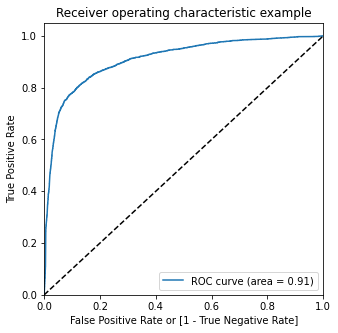

In [97]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [98]:
rfe_cols

['arpu_7',
 'loc_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_8']

In [99]:
X_rfe = X[rfe_cols]
X_rfe.shape

(34546, 15)

In [100]:
models_results = {}
lr_model_without_pca,models_results['LogisticRegression'] = create_models(logigistic_regression,X_rfe,y,test_size = 0.25)

array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

[[22513   494]
 [ 1569  1333]]
[[7512  158]
 [ 503  464]]


In [101]:
svc_model_without_pca,models_results['SVC'] = create_models(linear_svc,X,y,test_size = 0.25)

array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

[[22585   422]
 [ 1850  1052]]
[[7548  122]
 [ 618  349]]


In [102]:
decisiontree_model_without_pca,models_results['DecisionTree'] = create_models(decision_tree,X_rfe,y,test_size = 0.25) 


array([0, 0, 0, ..., 1, 0, 0])

array([0, 0, 0, ..., 1, 0, 0])

[[22941    66]
 [   12  2890]]
[[7258  412]
 [ 396  571]]


In [103]:
randonforest_model_without_pca,models_results['RandomForest'] = create_models(randomforest,X_rfe,y,test_size = 0.25) 


array([0, 0, 0, ..., 1, 0, 0])

array([0, 0, 0, ..., 1, 0, 0])

[[22941    66]
 [   12  2890]]
[[7246  424]
 [ 391  576]]


In [104]:
models_results

{'LogisticRegression': {'training': {'accuracy': 0.9203751592110849,
   'precision': 0.7296113847837986,
   'recall': 0.45933838731909027,
   'sensitivity': 0.9785282740035641,
   'false_positive_rate': 72.96000000000001,
   'true_positive_rate': 93.47999999999999,
   'true_negative_rate': 93.47999999999999,
   'f1_score': 0.7599724472199225,
   'Classification_error_rate': 7.960000000000001},
  'test': {'accuracy': 0.9234687970360079,
   'precision': 0.7459807073954984,
   'recall': 0.47983453981385726,
   'sensitivity': 0.9794002607561929,
   'false_positive_rate': 74.6,
   'true_positive_rate': 93.72,
   'true_negative_rate': 93.72,
   'f1_score': 0.7709364648936253,
   'Classification_error_rate': 7.6499999999999995},
  'confusion_matrix': y_test  0.0  1.0
  y_pred          
  0.0     837  100
  1.0      69    7},
 'SVC': {'training': {'accuracy': 0.9123084642402254,
   'precision': 0.7137042062415196,
   'recall': 0.36250861474844936,
   'sensitivity': 0.9816577563350285,
   'fals

In [105]:
models_results

model_results = pd.DataFrame()

for key in models_results:
    #print("\nTraining Results for {}\n".format(key))
    for result,value in models_results[key]['training'].items():
        #print("{0:35}:{1}".format(result,value))
        #print("\nTest Results for {}\n".format(key))
        ind = [ result for result,value in models_results[key]['test'].items()]   
        values = [ value for result,value in models_results[key]['test'].items()] 
    #for result,value in models_results[key]['test'].items():
    #    print("{0:35}:{1}".format(result,value))
    #index = 
    df_tmp = pd.DataFrame(values,index=ind,columns=[key])
    model_results = pd.concat([model_results,df_tmp],axis=1)
display(model_results.T.sort_values('accuracy',ascending=False))

,accuracy,precision,recall,sensitivity,false_positive_rate,true_positive_rate,true_negative_rate,f1_score,Classification_error_rate
LogisticRegression,0.923469,0.745981,0.479835,0.979400,74.60,93.72,93.72,0.770936,7.65
SVC,0.914322,0.740977,0.360910,0.984094,74.10,92.43,92.43,0.719334,8.57
DecisionTree,0.906449,0.580875,0.590486,0.946284,58.09,94.83,94.83,0.766457,9.36
RandomForest,0.905639,0.576000,0.595657,0.944720,57.60,94.88,94.88,0.766210,9.44


## Model with PCA

In [106]:
#Import PCA
from sklearn.decomposition import PCA

In [107]:
# Instantiate PCA
pca = PCA(random_state=42)

In [108]:
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_value_6,total_rech_value_7,total_rech_value_8
count,25909.0,25909.0,25909.0,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,...,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04,2.590900e+04
mean,0.0,0.0,0.0,1.257073e-16,3.566477e-17,1.429548e-16,1.478012e-16,-2.413275e-16,3.662806e-16,-1.224249e-17,...,-5.098074e-17,-2.794963e-15,-8.448048e-17,4.479072e-16,-2.246671e-16,-8.064104e-17,1.006550e-15,1.988280e-18,-4.776157e-17,-3.153395e-17
std,0.0,0.0,0.0,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,0.0,0.0,0.0,-1.652666e+00,-2.037796e+00,-1.392477e+00,-5.263493e-01,-5.133972e-01,-5.106087e-01,-7.509097e-01,...,-1.089571e+00,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,-1.013855e+00,-9.503007e-01,-9.337811e-01
25%,0.0,0.0,0.0,-7.122446e-01,-7.257853e-01,-7.340585e-01,-5.025753e-01,-4.924892e-01,-4.938348e-01,-6.233075e-01,...,-7.789995e-01,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,-6.847052e-01,-7.149653e-01,-7.135578e-01
50%,0.0,0.0,0.0,-2.557993e-01,-2.692824e-01,-2.540173e-01,-3.757806e-01,-3.772042e-01,-3.782466e-01,-3.500000e-01,...,-3.670613e-01,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,-2.485818e-01,-2.874394e-01,-2.731113e-01
75%,0.0,0.0,0.0,4.476690e-01,4.558752e-01,4.672083e-01,-6.764010e-03,-2.914827e-02,-2.959019e-02,1.988484e-01,...,5.743576e-01,-2.225458e-01,-2.128192e-01,-2.130348e-01,-2.830465e-01,-2.764169e-01,-2.801269e-01,4.179464e-01,3.911109e-01,3.728769e-01
max,0.0,0.0,0.0,9.402849e+00,8.928328e+00,1.040190e+01,8.311472e+00,8.049349e+00,8.004705e+00,7.474822e+00,...,3.333912e+00,1.038146e+01,1.046176e+01,1.024387e+01,1.509218e+01,1.577442e+01,1.438538e+01,1.018135e+01,1.062035e+01,1.024622e+01


In [109]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [110]:
pca.components_

array([[-3.98097843e-19, -5.55111512e-17,  1.11022302e-16, ...,
         1.54368896e-01,  1.71407641e-01,  1.57511185e-01],
       [-2.89394572e-20,  6.24500451e-17,  0.00000000e+00, ...,
         5.27040642e-02,  5.29434631e-02,  6.04115014e-02],
       [-1.65580402e-19, -9.71445147e-17, -1.24900090e-16, ...,
         6.36624162e-02,  8.63646330e-02,  7.82287642e-02],
       ...,
       [ 0.00000000e+00, -8.38197299e-17, -1.69111645e-17, ...,
        -5.80004930e-18,  6.90983409e-17,  8.30846381e-17],
       [ 9.99998121e-01, -4.99409957e-05, -1.75050341e-03, ...,
         2.05529221e-04, -3.59185610e-04,  7.25092704e-05],
       [ 0.00000000e+00,  1.45776456e-01,  2.71476397e-02, ...,
         1.16895720e-01, -1.44568141e-01, -5.51779071e-03]])

In [111]:
# Cumuliative varinace of the PCs
cumu_var = np.cumsum(pca.explained_variance_ratio_)
print(cumu_var)

[0.13720244 0.23971463 0.31984451 0.36413503 0.40124588 0.43573895
 0.46284798 0.4861043  0.50812426 0.52911846 0.54880368 0.56730848
 0.58444697 0.60056174 0.61535314 0.62872109 0.641521   0.65421426
 0.66645955 0.6782729  0.68979758 0.70083513 0.71115256 0.72121547
 0.73050365 0.73932867 0.74784867 0.75613875 0.76427002 0.77233677
 0.78012392 0.78754233 0.79489287 0.80212606 0.80922357 0.81571461
 0.82202637 0.82814927 0.83411072 0.83996647 0.84576343 0.85143937
 0.85695434 0.86240553 0.86768978 0.87291239 0.87798139 0.8830337
 0.8879778  0.89287215 0.89769897 0.90225489 0.90667765 0.91095768
 0.91518026 0.9191125  0.92291942 0.92636533 0.92965094 0.93292259
 0.93609399 0.93921644 0.9422093  0.94519212 0.94803367 0.95079934
 0.9535494  0.95618034 0.95871999 0.96124336 0.96363927 0.96598159
 0.96828686 0.97056973 0.97281631 0.97504375 0.97711241 0.97915087
 0.98109496 0.98301869 0.98471359 0.98621646 0.98770738 0.98906986
 0.99042383 0.99171878 0.99291644 0.99404763 0.99499777 0.99593

Text(0, 0.5, 'Cumulative Variance')

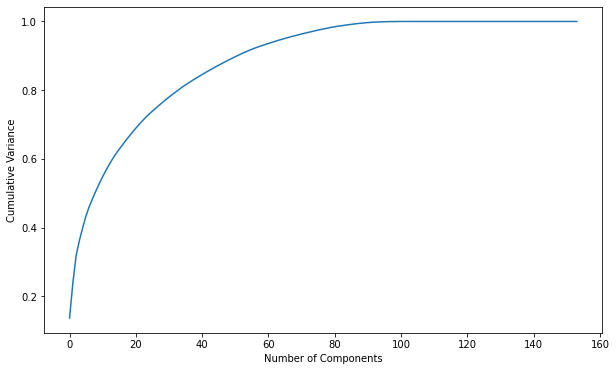

In [112]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(cumu_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [113]:
# Importing incremental PCA
from sklearn.decomposition import PCA

In [114]:
# Instantiate PCA with 90 components as that gives a good 90% cover
pca_final = PCA(.95)

In [115]:
# Fit and transform the X_train
X_pca = pca_final.fit_transform(X)
#X_test_pca  = pca_final.transform(X_test)

In [116]:
print(X_pca.shape)

(34546, 16)


In [117]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca  = pca_final.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(25909, 66)
(8637, 66)


In [118]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-3.877035,-0.210578,-0.941784,0.360793,-0.313381,-0.315223,0.630979,1.491051,-0.192173,-0.276086,...,-0.326665,0.264070,-0.104678,-0.294265,-0.231994,-0.203440,0.793566,0.009839,0.078538,-0.065055
1,-4.000309,-0.358603,0.854255,-0.139492,1.646498,-0.210440,0.314666,0.222499,1.296648,-0.296950,...,0.147842,-0.151060,0.300856,-0.192714,-0.262984,0.785942,-1.252167,0.398049,0.098387,0.553807
2,1.608861,6.550875,2.022667,8.019230,-0.741840,-2.126531,-0.007059,-2.714946,2.402585,1.092534,...,-1.818871,-0.122863,-0.105021,-0.056677,-1.305238,-0.832248,0.588803,1.841180,0.665721,1.461996
3,-2.090335,-0.777627,1.583837,-0.967734,-0.087480,-0.570491,-0.661934,-1.401660,-0.096667,0.573213,...,0.254909,0.056000,2.023424,1.533823,-1.003680,-0.188299,-0.079474,-0.326958,0.339662,-0.484243
4,-4.176780,-0.146814,-0.749307,0.111561,-0.083995,-0.683643,-0.288282,1.157704,-0.265964,0.261906,...,-0.234175,0.034475,-0.108922,-0.162581,-0.004269,-0.237373,-0.018241,0.009081,0.068655,-0.053193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25904,4.652748,-1.924751,-3.760452,-0.775898,-2.227164,-2.578950,-1.637713,-0.639994,1.729197,-0.710964,...,0.828721,0.476244,0.306524,0.063231,0.597938,-0.479589,0.510462,0.079856,-0.680227,0.103139
25905,-4.292962,-0.044800,-0.717633,-0.110317,-0.350259,-0.695141,-0.435591,0.802273,-0.150104,0.011938,...,0.011407,-0.063333,-0.015345,-0.034368,0.015262,-0.163247,-0.026209,0.071409,0.053700,0.010387
25906,-3.834668,0.464918,0.635665,-0.927089,-0.566574,-1.182767,-0.390429,-0.672326,0.177930,-0.004639,...,0.098795,-0.095669,0.182101,0.265216,0.447701,0.358231,0.143999,0.204648,-0.005811,0.073480
25907,21.460216,7.019102,-2.646756,3.074301,4.190567,7.795649,1.978973,-0.744778,0.917730,1.194619,...,0.889736,0.472120,1.430473,-0.399803,-1.889545,0.538282,0.353512,3.415094,-0.082967,1.345321


In [119]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [120]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [121]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [122]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073466,0.002128,0.002536,0.000230,0.01,{'C': 0.01},0.332781,0.424188,0.317708,0.352234,...,0.361150,0.037572,6,0.348564,0.395230,0.340929,0.384483,0.370898,0.368021,0.020650
1,0.093479,0.004214,0.002421,0.000100,0.1,{'C': 0.1},0.410596,0.510830,0.376736,0.412371,...,0.429820,0.045014,5,0.418190,0.472317,0.414445,0.454310,0.449914,0.441835,0.022178
2,0.086361,0.003689,0.002534,0.000341,1,{'C': 1},0.427152,0.516245,0.390625,0.422680,...,0.442467,0.042262,1,0.426893,0.480409,0.424764,0.462931,0.454663,0.449932,0.021375
3,0.101444,0.007361,0.002559,0.000174,10,{'C': 10},0.427152,0.516245,0.390625,0.422680,...,0.442467,0.042262,1,0.428634,0.480835,0.426483,0.462931,0.455095,0.450796,0.020738
4,0.098742,0.007895,0.002538,0.000324,100,{'C': 100},0.427152,0.516245,0.390625,0.422680,...,0.442467,0.042262,1,0.428634,0.480835,0.426483,0.462931,0.455095,0.450796,0.020738
5,0.124586,0.035137,0.002520,0.000125,1000,{'C': 1000},0.427152,0.516245,0.390625,0.422680,...,0.442467,0.042262,1,0.429069,0.480835,0.426483,0.462931,0.455095,0.450883,0.020646


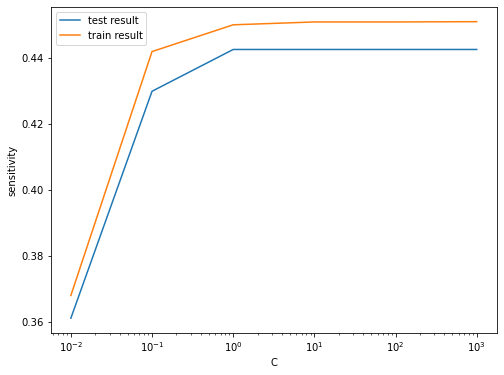

In [123]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [124]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.44246692338679117 at C = 1


In [125]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [126]:
# Fit the model on the train set
logistic_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [127]:
# Predictions on the train set
y_train_pred = logistic_pca_model.predict(X_train_pca)

In [128]:
pd.DataFrame(y_train_pred).value_counts()

0    24042
1     1867
dtype: int64

In [129]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred})
y_train_pred_final.head()

,churn,churn_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [130]:
y_train_pred_final['churn_prob'].value_counts()

0    24042
1     1867
Name: churn_prob, dtype: int64

In [131]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[22455   552]
 [ 1587  1315]]


In [132]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# Accuracy
print("Accuracy                    :",(round( (TP+TN) / float(TP+FP+TN+FN), 4)* 100))
# Sensitivity
print("Sensitivity                 :",TP / float(TP+FN))
# Specificity
print("Specificity                 :", TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
#It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative
print("False Positive Rate         :", round(FP/ float(TN+FP), 4) * 100)
# positive predictive value 
print("Positive Predictive Value   :",round(TP / float(TP+FP), 4)* 100)

# Negative predictive value
print("Positive Predictive Value   :",round(TN / float(TN+ FN), 4) * 100)
print("Classification Error Rate   :",(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100))

print("-----------------------------")
print("Using sklean inbuild modules")
print("-----------------------------")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1 score                    :",f1_score(y_train,y_train_pred, average="macro"))
print("Accuracy                    :",metrics.accuracy_score(y_train,y_train_pred))
print("Precision score             :",precision_score(y_train,y_train_pred, average="macro"))
print("Recall score                :",recall_score(y_train,y_train_pred, average="macro"))

Accuracy                    : 91.74
Sensitivity                 : 0.4531357684355617
Specificity                 : 0.9760073021254401
False Positive Rate         : 2.4
Positive Predictive Value   : 70.43
Positive Predictive Value   : 93.4
Classification Error Rate   : 8.260000000000002
-----------------------------
Using sklean inbuild modules
-----------------------------
f1 score                    : 0.753007528442762
Accuracy                    : 0.9174418155853178
Precision score             : 0.8191645137880696
Recall score                : 0.7145715352805009


In [134]:
# Predictions on the test  set
y_test_pred = logistic_pca_model.predict(X_test_pca)

In [135]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred})
y_test_pred_final.head(5)

,churn,churn_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [136]:
y_test_pred_final['churn_prob'].value_counts()

0    8517
1     120
Name: churn_prob, dtype: int64

In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7634   36]
 [ 883   84]]


In [138]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy                    :",(round( (TP+TN) / float(TP+FP+TN+FN), 4)* 100))
# Sensitivity
print("Sensitivity                 :",TP / float(TP+FN))
# Specificity
print("Specificity                 :", TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
#It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative
print("False Positive Rate         :", round(FP/ float(TN+FP), 4) * 100)
# positive predictive value 
print("Positive Predictive Value   :",round(TP / float(TP+FP), 4)* 100)

# Negative predictive value
print("Positive Predictive Value   :",round(TN / float(TN+ FN), 4) * 100)
print("Classification Error Rate   :",(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100))

print("-----------------------------")
print("Using sklean inbuild modules")
print("-----------------------------")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1 score                    :",f1_score(y_test,y_test_pred, average="macro"))
print("Accuracy                    :",metrics.accuracy_score(y_test,y_test_pred))
print("Precision score             :",precision_score(y_test,y_test_pred, average="macro"))
print("Recall score                :",recall_score(y_test,y_test_pred, average="macro"))

Accuracy                    : 89.36
Sensitivity                 : 0.08686659772492245
Specificity                 : 0.9953063885267275
False Positive Rate         : 0.47000000000000003
Positive Predictive Value   : 70.0
Positive Predictive Value   : 89.63
Classification Error Rate   : 10.639999999999999
-----------------------------
Using sklean inbuild modules
-----------------------------
f1 score                    : 0.5488899317197139
Accuracy                    : 0.893597313882135
Precision score             : 0.798162498532347
Recall score                : 0.541086493125825


In [140]:
models_results = {}
#create_models(logigistic_regression,X,y,test_size = 0.25,scale=False)
lr_with_pca,models_results['LogisticRegression(PCA)'] = create_models(logigistic_regression,X_pca,y,test_size = 0.25,scale=False)

array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

[[22690   317]
 [ 2229   673]]
[[7559  111]
 [ 747  220]]


In [141]:
svc_with_pca,models_results['SVC(PCA)'] = create_models(linear_svc,X_pca,y,test_size = 0.25,scale=False)

array([0, 0, 0, ..., 0, 1, 0])

array([0, 0, 0, ..., 0, 1, 0])

[[20500  2507]
 [ 1834  1068]]
[[6795  875]
 [ 642  325]]


In [142]:
decisiontree_with_pca,models_results['DecisionTree(PCA)'] = create_models(decision_tree,X_pca,y,test_size = 0.25,scale=False) 

array([0, 0, 0, ..., 1, 0, 0])

array([0, 0, 0, ..., 1, 0, 0])

[[23007     0]
 [    0  2902]]
[[7104  566]
 [ 525  442]]


In [143]:
randomforest_with_pca,models_results['RandomForest'] = create_models(randomforest,X_pca,y,test_size = 0.25,scale=False) 


array([0, 0, 0, ..., 1, 0, 0])

array([0, 0, 0, ..., 1, 0, 0])

[[23007     0]
 [    0  2902]]
[[7105  565]
 [ 513  454]]


In [144]:
models_results

#model_results = pd.DataFrame()

for key in models_results:
    #print("\nTraining Results for {}\n".format(key))
    for result,value in models_results[key]['training'].items():
        #print("{0:35}:{1}".format(result,value))
        #print("\nTest Results for {}\n".format(key))
        ind = [ result for result,value in models_results[key]['test'].items()]   
        values = [ value for result,value in models_results[key]['test'].items()] 
    #for result,value in models_results[key]['test'].items():
    #    print("{0:35}:{1}".format(result,value))
    #index = 
    df_tmp = pd.DataFrame(values,index=ind,columns=[key])
    model_results = pd.concat([model_results,df_tmp],axis=1)
display(model_results.T)

,accuracy,precision,recall,sensitivity,false_positive_rate,true_positive_rate,true_negative_rate,f1_score,Classification_error_rate
LogisticRegression,0.923469,0.745981,0.479835,0.979400,74.60,93.72,93.72,0.770936,7.65
SVC,0.914322,0.740977,0.360910,0.984094,74.10,92.43,92.43,0.719334,8.57
DecisionTree,0.906449,0.580875,0.590486,0.946284,58.09,94.83,94.83,0.766457,9.36
RandomForest,0.905639,0.576000,0.595657,0.944720,57.60,94.88,94.88,0.766210,9.44
LogisticRegression(PCA),0.900660,0.664653,0.227508,0.985528,66.47,91.01,91.01,0.642639,9.93
SVC(PCA),0.824360,0.270833,0.336091,0.885919,27.08,91.37,91.37,0.599768,17.56
DecisionTree(PCA),0.873683,0.438492,0.457084,0.926206,43.85,93.12,93.12,0.688142,12.63
RandomForest,0.875188,0.445535,0.469493,0.926336,44.55,93.27,93.27,0.693344,12.48


In [145]:
display(model_results.T.sort_values('accuracy',ascending=False))

,accuracy,precision,recall,sensitivity,false_positive_rate,true_positive_rate,true_negative_rate,f1_score,Classification_error_rate
LogisticRegression,0.923469,0.745981,0.479835,0.979400,74.60,93.72,93.72,0.770936,7.65
SVC,0.914322,0.740977,0.360910,0.984094,74.10,92.43,92.43,0.719334,8.57
DecisionTree,0.906449,0.580875,0.590486,0.946284,58.09,94.83,94.83,0.766457,9.36
RandomForest,0.905639,0.576000,0.595657,0.944720,57.60,94.88,94.88,0.766210,9.44
LogisticRegression(PCA),0.900660,0.664653,0.227508,0.985528,66.47,91.01,91.01,0.642639,9.93
RandomForest,0.875188,0.445535,0.469493,0.926336,44.55,93.27,93.27,0.693344,12.48
DecisionTree(PCA),0.873683,0.438492,0.457084,0.926206,43.85,93.12,93.12,0.688142,12.63
SVC(PCA),0.824360,0.270833,0.336091,0.885919,27.08,91.37,91.37,0.599768,17.56


### Test Data Prediction withPCA model

In [146]:
telecom_df_test.shape

(30000, 154)

In [147]:
# Getting the predicted value on the train set
X_unseen_pca =pca_final.transform(telecom_df_test)

In [148]:
X_unseen_pca.shape

(30000, 66)

In [149]:
y_unseen = logistic_pca_model.predict(X_unseen_pca)

In [150]:
y_unseen_pred = pd.DataFrame(y_unseen)

In [151]:
y_unseen_pred.value_counts()

0    27636
1     2364
dtype: int64

### Test Data Prediction Without  PCA model

In [152]:
y_unseen_without_pca = lr_model_without_pca.predict(telecom_df_test[rfe_cols]) 

In [153]:
pd.DataFrame(y_unseen_without_pca).value_counts()

0    28036
1     1964
dtype: int64